TRAIN RIDE DATASET

This dataset contain 10,043 records of train ticket transactions, capturing details about ticket purchases, journey schedules, and customer service interactions. It includes key information such as the date and time of purchase, ticket type, payment method, and railcard usage. Journey details such as departure and arrival stations, scheduled and actual arrival times, and journey status (on-time or delayed) are also recorded. Additionally, the dataset tracks delay reasons and whether passengers requested refunds. This information can be useful for analyzing travel patterns, ticket pricing, service reliability, and customer behavior.

IMPORT LIBARIES AND LOADING DATA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv(r"C:\Data Science\data_set\train2.csv")

IMPORT FIRST FIVE DATA

In [2]:
data.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,08-12-2023,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,01-01-2024,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,16-12-2023,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,01-01-2024,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,19-12-2023,19:51:27,Online,Credit Card,None,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,02-01-2024,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,20-12-2023,23:00:36,Station,Credit Card,None,Standard,Advance,13,London Paddington,Reading,01-01-2024,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,27-12-2023,18:22:56,Online,Contactless,None,Standard,Advance,76,Liverpool Lime Street,London Euston,01-01-2024,16:45:00,19:00:00,19:00:00,On Time,NaN,No


IMPORT LAST FIVE DATA

In [3]:
data.tail()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
10037,948221c2-aaa1-4c07-98c3,04-02-2024,16:02:12,Station,Credit Card,None,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,04-02-2024,17:45:00,18:15:00,19:00:00,Delayed,Weather Conditions,No
10038,235a5af3-3cb4-4f19-95b5,04-02-2024,16:02:56,Station,Debit Card,None,Standard,Advance,29,Edinburgh Waverley,London Kings Cross,23-02-2024,15:30:00,19:50:00,20:09:00,Delayed,Staffing,Yes
10039,fc712c9e-50df-43b0-be34,04-02-2024,16:04:30,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,12-02-2024,14:30:00,16:20:00,16:20:00,On Time,NaN,No
10040,72a618e3-c3cf-4b94-a53a,04-02-2024,16:08:51,Online,Credit Card,Adult,Standard,Off-Peak,3,Liverpool Lime Street,Manchester Piccadilly,04-02-2024,17:30:00,18:00:00,18:00:00,On Time,NaN,No
10041,303116cd-1e4e-4512-8e3a,04-02-2024,16:14:16,Station,Credit Card,None,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,04-02-2024,17:45:00,18:15:00,19:00:00,Delayed,Weather Conditions,No


ANALYSIS AND CLEANING

FIND AND REPLACE NULL

In [4]:

print(data.isna().sum())



Transaction ID            0
Date of Purchase          0
Time of Purchase          0
Purchase Type             0
Payment Method            0
Railcard                  0
Ticket Class              0
Ticket Type               0
Price                     0
Departure Station         0
Arrival Destination       0
Date of Journey           0
Departure Time            0
Arrival Time              0
Actual Arrival Time     603
Journey Status            0
Reason for Delay       8743
Refund Request            0
dtype: int64


In [5]:
data.fillna(0,inplace=True)

CHANGE THE DATA TYPE AND PRINT INFORMATION OF DATA

In [6]:

data['Date of Purchase']=pd.to_datetime(data['Date of Purchase'])
data['Date of Journey']=pd.to_datetime(data['Date of Journey'])
data['Price']=data['Price'].astype("float64")
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10042 entries, 0 to 10041
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction ID       10042 non-null  object        
 1   Date of Purchase     10042 non-null  datetime64[ns]
 2   Time of Purchase     10042 non-null  object        
 3   Purchase Type        10042 non-null  object        
 4   Payment Method       10042 non-null  object        
 5   Railcard             10042 non-null  object        
 6   Ticket Class         10042 non-null  object        
 7   Ticket Type          10042 non-null  object        
 8   Price                10042 non-null  float64       
 9   Departure Station    10042 non-null  object        
 10  Arrival Destination  10042 non-null  object        
 11  Date of Journey      10042 non-null  datetime64[ns]
 12  Departure Time       10042 non-null  object        
 13  Arrival Time         10042 non-

C:\Users\jayak\AppData\Local\Temp\ipykernel_16288\839240908.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date of Purchase']=pd.to_datetime(data['Date of Purchase'])
C:\Users\jayak\AppData\Local\Temp\ipykernel_16288\839240908.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date of Journey']=pd.to_datetime(data['Date of Journey'])


RENAME COLUMNS

In [7]:
rename=data.rename(columns={"Transaction ID":"Transaction_ID","Date of Purchase":"Date_of_Purchase","Time of Purchase":"Time_of_Purchase","Purchase Type":"Purchase_Type","Payment Method":"Payement_Method","Ticket Class":"Ticket_Class","Ticket Type":"Ticket_Type","Departure Station":"Departure_Station","Arrival Destination":"Arrival_Destination","Date of Journey":"Date_of_Journey","Departure Time":"Departure_Time","Arrival Time":"Arrival_Time","Actual Arrival Time":"Actual_Arrival_Time","Journey Status":"Journey_Status","Reason for Delay":"Reason_for_Delay","Refund Request":"Refund_Request"},inplace=True)
print(data.head())


            Transaction_ID Date_of_Purchase Time_of_Purchase Purchase_Type  \
0  da8a6ba8-b3dc-4677-b176       2023-08-12         12:41:11        Online   
1  b0cdd1b0-f214-4197-be53       2023-12-16         11:23:01       Station   
2  f3ba7a96-f713-40d9-9629       2023-12-19         19:51:27        Online   
3  b2471f11-4fe7-4c87-8ab4       2023-12-20         23:00:36       Station   
4  2be00b45-0762-485e-a7a3       2023-12-27         18:22:56        Online   

  Payement_Method Railcard Ticket_Class Ticket_Type  Price  \
0     Contactless    Adult     Standard     Advance   43.0   
1     Credit Card    Adult     Standard     Advance   23.0   
2     Credit Card     None     Standard     Advance    3.0   
3     Credit Card     None     Standard     Advance   13.0   
4     Contactless     None     Standard     Advance   76.0   

       Departure_Station    Arrival_Destination Date_of_Journey  \
0      London Paddington  Liverpool Lime Street      2024-01-01   
1     London Kings Cross

CHANGE VALUE PRICE USING LOC()

In [8]:

data.loc[5,'Price']=56
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10042 entries, 0 to 10041
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction_ID       10042 non-null  object        
 1   Date_of_Purchase     10042 non-null  datetime64[ns]
 2   Time_of_Purchase     10042 non-null  object        
 3   Purchase_Type        10042 non-null  object        
 4   Payement_Method      10042 non-null  object        
 5   Railcard             10042 non-null  object        
 6   Ticket_Class         10042 non-null  object        
 7   Ticket_Type          10042 non-null  object        
 8   Price                10042 non-null  float64       
 9   Departure_Station    10042 non-null  object        
 10  Arrival_Destination  10042 non-null  object        
 11  Date_of_Journey      10042 non-null  datetime64[ns]
 12  Departure_Time       10042 non-null  object        
 13  Arrival_Time         10042 non-

CREATE BOXPLOT

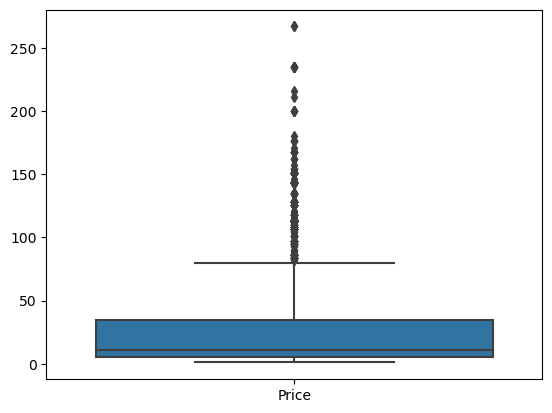

In [9]:

sns.boxplot(data=data)
plt.show()

REMOVE OUTLAYERS USING FOR LOOP

In [10]:

for x in data.index:
    if data.loc[x,"Price"]>40:
     data.loc[x,"Price"]= 20

print(data.head())



            Transaction_ID Date_of_Purchase Time_of_Purchase Purchase_Type  \
0  da8a6ba8-b3dc-4677-b176       2023-08-12         12:41:11        Online   
1  b0cdd1b0-f214-4197-be53       2023-12-16         11:23:01       Station   
2  f3ba7a96-f713-40d9-9629       2023-12-19         19:51:27        Online   
3  b2471f11-4fe7-4c87-8ab4       2023-12-20         23:00:36       Station   
4  2be00b45-0762-485e-a7a3       2023-12-27         18:22:56        Online   

  Payement_Method Railcard Ticket_Class Ticket_Type  Price  \
0     Contactless    Adult     Standard     Advance   20.0   
1     Credit Card    Adult     Standard     Advance   23.0   
2     Credit Card     None     Standard     Advance    3.0   
3     Credit Card     None     Standard     Advance   13.0   
4     Contactless     None     Standard     Advance   20.0   

       Departure_Station    Arrival_Destination Date_of_Journey  \
0      London Paddington  Liverpool Lime Street      2024-01-01   
1     London Kings Cross

AFTER REMOVING OUTLAYERS

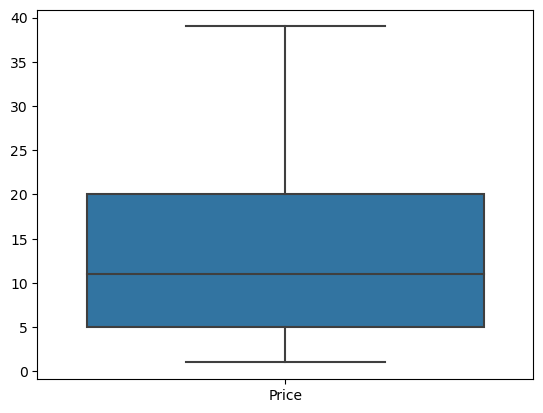

In [11]:
sns.boxplot(data=data)
plt.show()




FINDING AND REMOVING DUPIICATES

In [12]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)



DESCRIBE THE DATA 

In [13]:
df=pd.DataFrame(data)
print(df.describe())


              Price
count  10042.000000
mean      13.186517
std        9.480299
min        1.000000
25%        5.000000
50%       11.000000
75%       20.000000
max       39.000000


HEATMAP & CORRELATION

       Price
Price    1.0


C:\Users\jayak\AppData\Local\Temp\ipykernel_16288\3874089551.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cr=data.corr()


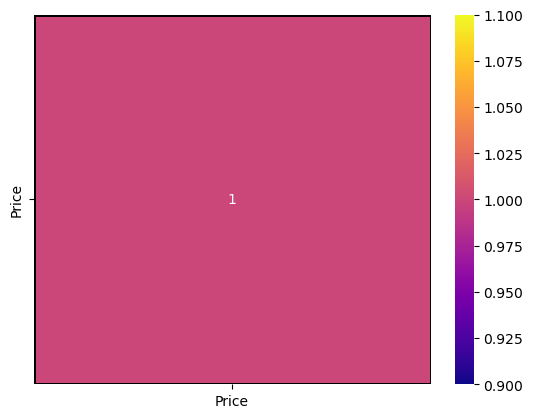

In [14]:
cr=data.corr()
print(cr)
sns.heatmap(cr, annot=True, cmap='plasma', linecolor='black', linewidths=1)
plt.show()

1.SALES AND REVENUE ANALYSIS

what is the total revenue from ticket sales?

Total Revenue:132419.00


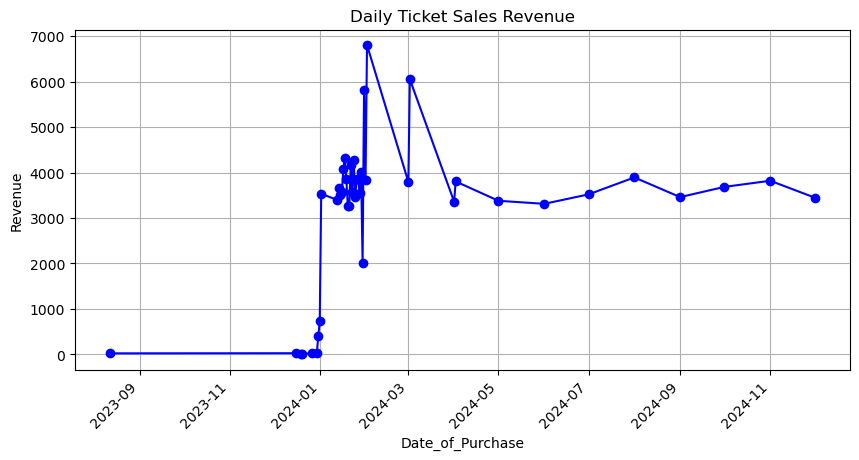

In [15]:
#calculate total revenue
total_revenue=data["Price"].sum()
#print("Total Revenue",  total_revenue)
print(f'Total Revenue:{total_revenue:.2f}')

#plot revenue distribution

plt.figure(figsize=(10, 5))
df.groupby("Date_of_Purchase")["Price"].sum().plot(kind="line", marker="o", linestyle="-", color="b")
plt.xlabel("Date_of_Purchase")
plt.ylabel("Revenue")
plt.title("Daily Ticket Sales Revenue")
plt.xticks(rotation=45)
plt.grid()
plt.show()

what is the average ticket price ?

In [16]:
#calculate average of ticket price 
average_ticket_price=data['Price'].mean()
print(f"average_ticket_price= £{average_ticket_price:2f}")

average_ticket_price= £13.186517


How does revenue vary by ticket class?

Ticket_Class
First Class     18114.0
Standard       114305.0
Name: Price, dtype: float64


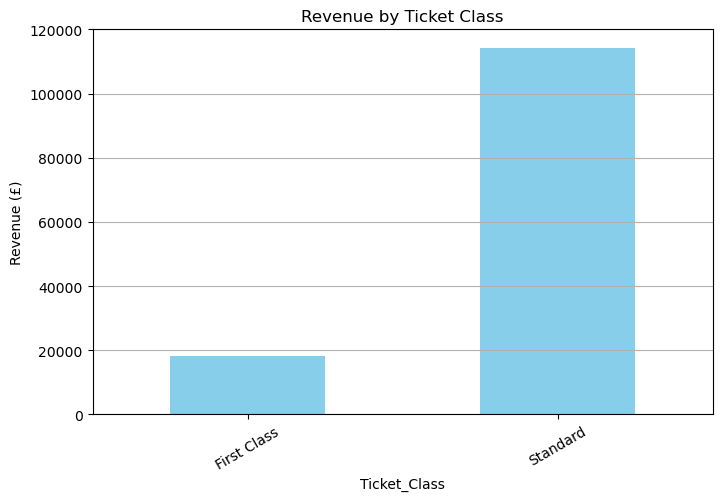

In [17]:

# Group by 'Ticket Class' and sum the 'Price' to calculate revenue by class
revenue_by_class = data.groupby('Ticket_Class')['Price'].sum()

# Print the revenue by class
print(revenue_by_class)

# Plot the results as a bar chart
plt.figure(figsize=(8, 5))
revenue_by_class.plot(kind='bar', color='skyblue')
plt.title('Revenue by Ticket Class')
plt.xlabel('Ticket_Class')
plt.ylabel('Revenue (£)')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.show()

Which purchase type generates the most revenue?

Purchase_Type
Online     78398.0
Station    54021.0
Name: Price, dtype: float64


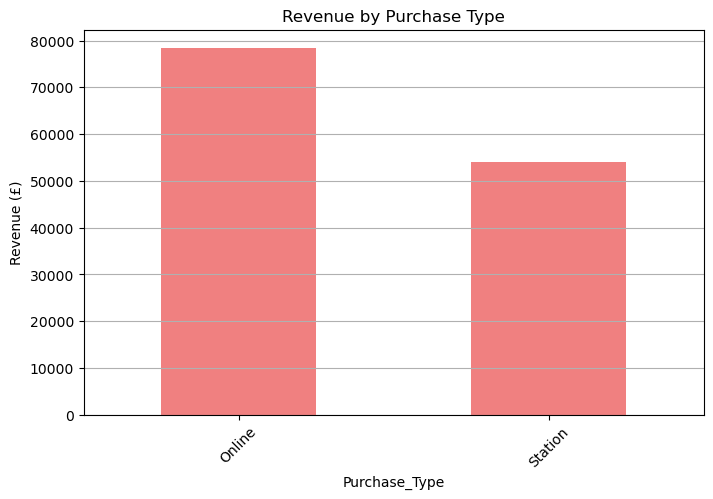

In [18]:
# Group by 'Purchase Type' and sum the 'Price' to calculate revenue by purchase type
revenue_by_purchase_type = data.groupby('Purchase_Type')['Price'].sum()

# Print the revenue by purchase type
print(revenue_by_purchase_type)

# Plot the results as a bar chart
plt.figure(figsize=(8, 5))
revenue_by_purchase_type.plot(kind='bar', color='lightcoral')
plt.title('Revenue by Purchase Type')
plt.xlabel('Purchase_Type')
plt.ylabel('Revenue (£)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

2.CUSTOMER BEHAVIOR & TICKET TRENDS

What are the most commonly purchased ticket types?

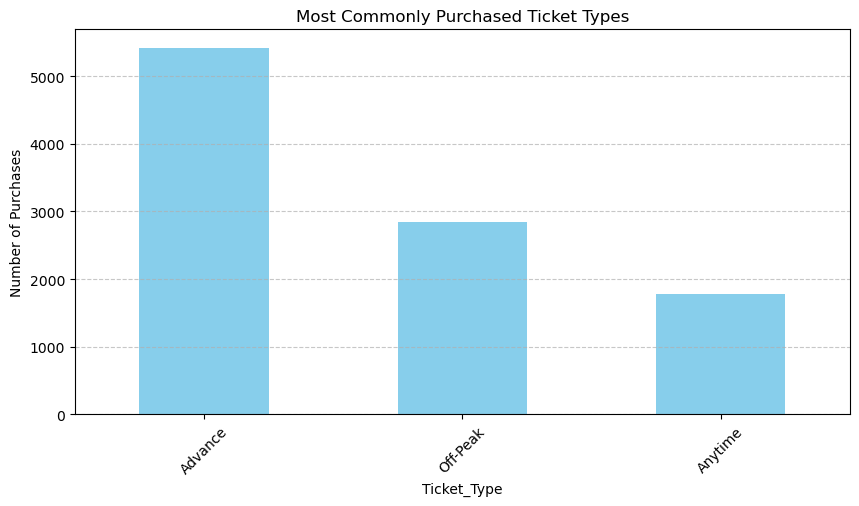

In [19]:
#Count the occurrences of each ticket type
ticket_counts = data['Ticket_Type'].value_counts()

# Plot the data
plt.figure(figsize=(10, 5))
ticket_counts.plot(kind='bar', color='skyblue')

# Customize the plot
plt.xlabel("Ticket_Type")
plt.ylabel("Number of Purchases")
plt.title("Most Commonly Purchased Ticket Types")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

How many transaction involve a railcard?

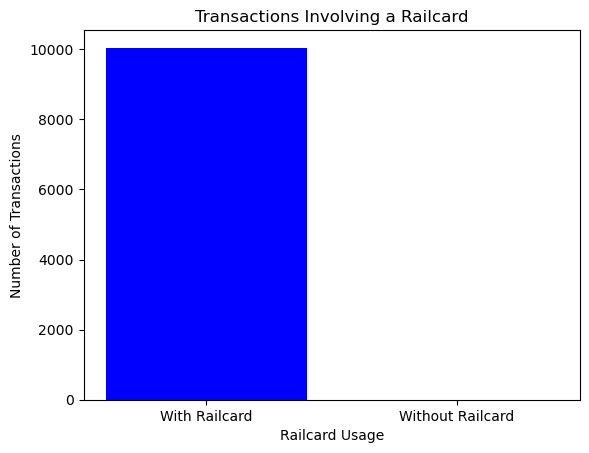

Transactions with a Railcard: 10042
Transactions without a Railcard: 0


In [20]:
#Count transactions involving a railcard
railcard_count = data['Railcard'].notna().sum()  # Assuming non-null values indicate usage
no_railcard_count = len(data) - railcard_count

# Create a bar chart
labels = ['With Railcard', 'Without Railcard']
counts = [railcard_count, no_railcard_count]

plt.bar(labels, counts, color=['blue', 'red'])
plt.xlabel("Railcard Usage")
plt.ylabel("Number of Transactions")
plt.title("Transactions Involving a Railcard")
plt.show()

# Print counts
print(f"Transactions with a Railcard: {railcard_count}")
print(f"Transactions without a Railcard: {no_railcard_count}")

what are the top 5 most common deaparture stations and arrival destinatons ?show using pie chart?

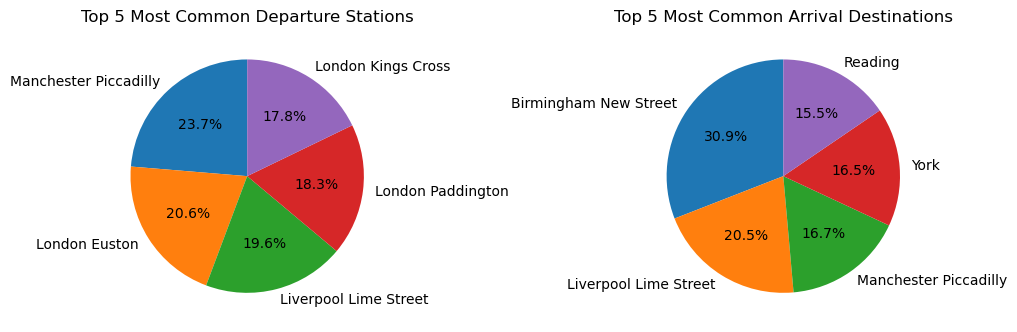

In [21]:
# Find the top 5 most common departure stations
departure_counts = data['Departure_Station'].value_counts().nlargest(5)

# Find the top 5 most common arrival destinations
arrival_counts = data['Arrival_Destination'].value_counts().nlargest(5)

# Plot pie chart for departure stations
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # First subplot
plt.pie(departure_counts, labels=departure_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 5 Most Common Departure Stations")

# Plot pie chart for arrival destinations
plt.subplot(1, 2, 2)  # Second subplot
plt.pie(arrival_counts, labels=arrival_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 5 Most Common Arrival Destinations")

# Show the charts
plt.tight_layout()
plt.show()

what are the departure stations and there price?

Departure_Station
Birmingham New Street     637
Bristol Temple Meads        3
Edinburgh Waverley         18
Liverpool Lime Street    1500
London Euston            1574
London Kings Cross       1363
London Paddington        1397
London St Pancras        1209
Manchester Piccadilly    1811
Oxford                     42
Reading                   192
York                      296
Name: Price, dtype: int64


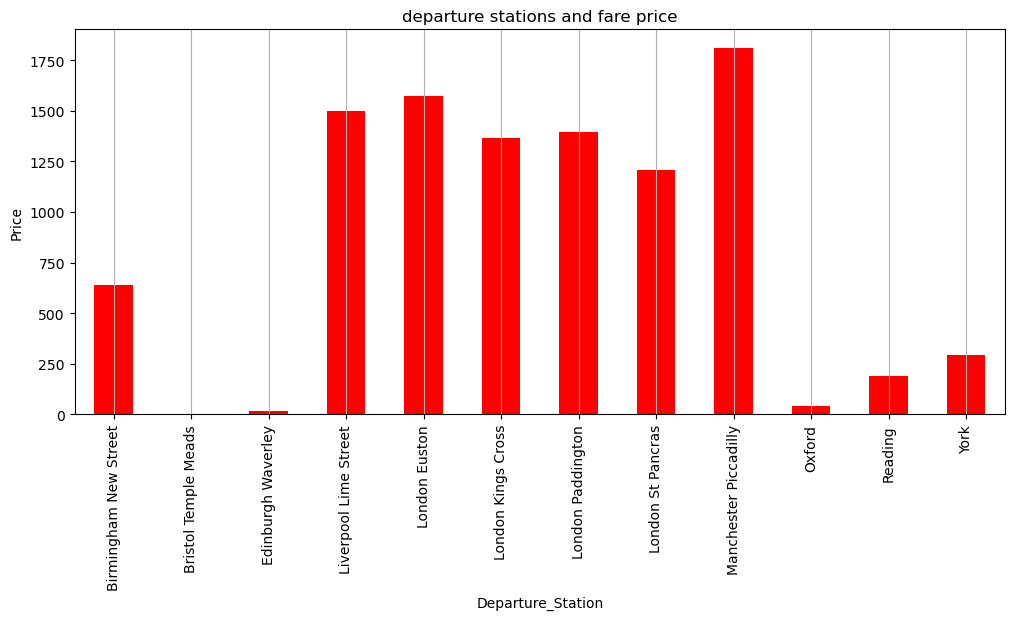

In [22]:
departure_station_price=data.groupby("Departure_Station")["Price"].count()
print(departure_station_price)
#plot graph
plt.figure(figsize=(12,5))
departure_station_price.plot.bar(color="r")
plt.title("departure stations and fare price")
plt.xlabel("Departure_Station")
plt.ylabel("Price")
plt.grid(axis= 'x')
plt.show()

3.JOURNEY PERFORMANCE & DELAYS

How many journeys were on-time ,delayed,or canceled?

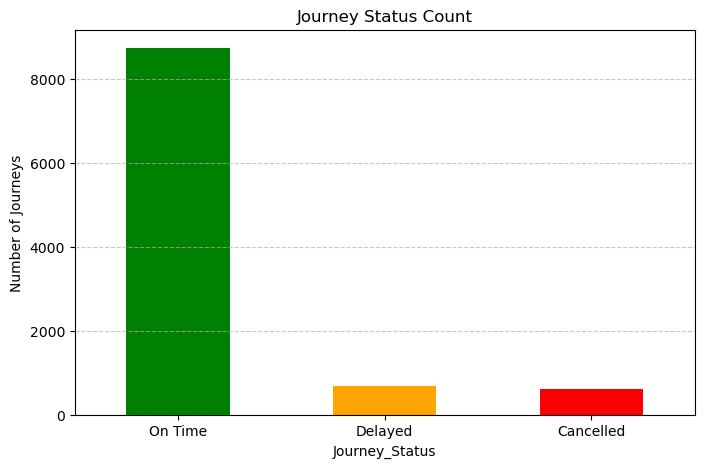

In [23]:
#Count occurrences of each journey status
journey_counts = data["Journey_Status"].value_counts()

# Plot the bar chart
plt.figure(figsize=(8,5))
journey_counts.plot(kind="bar", color=["green", "orange", "red"])  # Customize colors
plt.title("Journey Status Count")
plt.xlabel("Journey_Status")
plt.ylabel("Number of Journeys")
plt.xticks(rotation=0)  # Keep labels horizontal
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add grid for readability

# Show the plot
plt.show()

What is the average delay time for late journeys?

In [24]:
# Convert time columns to datetime format
data["Arrival_Time"] = pd.to_datetime(data["Arrival_Time"])
data["Actual_Arrival_Time"] = pd.to_datetime(data["Actual_Arrival_Time"])

# Calculate delay time in minutes
data["Delay (minutes)"] = (data["Actual_Arrival_Time"] - data["Arrival_Time"]).dt.total_seconds() / 60

# Filter only delayed journeys
delayed_journeys = data[data["Journey_Status"] == "Delayed"]

# Calculate average delay time
average_delay = delayed_journeys["Delay (minutes)"].mean()

# Print result
print(f"Average Delay Time for Late Journeys: {average_delay:.2f} minutes")



Average Delay Time for Late Journeys: 44.30 minutes


What are the top 10 most common reason for delay?

Weather               221
Technical Issue       128
Signal Failure         81
Weather Conditions     65
Staffing               65
Staff Shortage         57
Signal failure         57
Traffic                22
Name: Reason_for_Delay, dtype: int64


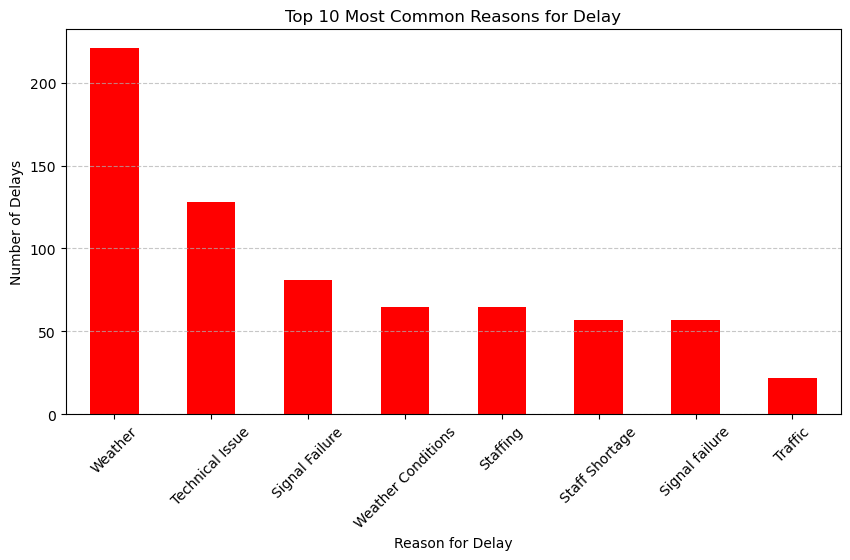

In [25]:

# Filter only delayed journeys
delayed_journeys = data[data['Journey_Status'] == 'Delayed']

# Count occurrences of each delay reason
delay_reasons_count = delayed_journeys['Reason_for_Delay'].value_counts()

# Display the top delay reasons
print(delay_reasons_count.head(10))


# Plot the top 10 delay reasons
plt.figure(figsize=(10,5))
delay_reasons_count.head(10).plot(kind='bar', color='red')

plt.xlabel('Reason for Delay')
plt.ylabel('Number of Delays')
plt.title('Top 10 Most Common Reasons for Delay')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


4.REFUND & CUSOMER ISSUES

How many transaction had a refund request?

No     9687
Yes     355
Name: Refund_Request, dtype: int64


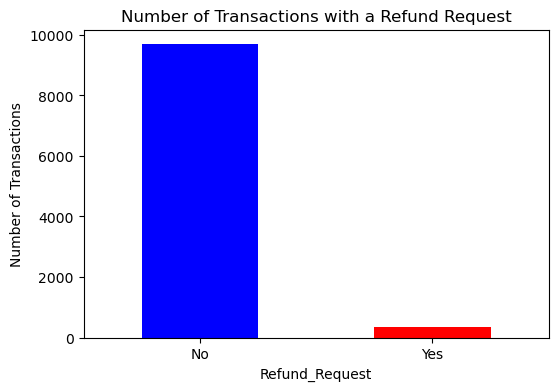

In [26]:
# Count transactions with a refund request
refund_counts = data['Refund_Request'].value_counts()

# Display the counts
print(refund_counts)

# Plot the results
plt.figure(figsize=(6,4))
refund_counts.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Refund_Request')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions with a Refund Request')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'], rotation=0)
plt.show()

What is the total revenue lost due to refunds?

In [27]:
# Filter transactions where a refund was requested
refunded_sales = data[data['Refund_Request'] == 'Yes']

# Calculate total revenue lost
total_revenue_lost = refunded_sales['Price'].sum()
print(f"Total revenue lost due to refunds: {total_revenue_lost}")

Total revenue lost due to refunds: 5370.0


SUMMARY

The analysis reveals that all transactions used a railcard, most journeys were on time, Manchester Piccadilly and Birmingham New Street were the most common departure and arrival stations respectively, and online ticket purchases generated higher revenue than station purchases.The visualizations indicate that total ticket sales revenue is (£132,419), with significantly higher revenue from Standard Class (£114,305) compared to First Class (£18,114), and daily revenue trends showing fluctuations over time.

SUGGESTION


1.Offer additional premium services such as free Wi-Fi, gourmet meals, and priority boarding to enhance the overall experience.

2.Optimize the online booking platform to make it more user-friendly, fast, and accessible.

3.improve on-time journey status is to analyze peak-hour congestion and adjust scheduling accordingly.

4.Identify patterns in past delays based on factors like time of day, route, and station:

5.Helps the company take corrective actions, such as improving punctuality, customer service, or ticketing policies.

6.if most refunds are due to journey delays, implementing better delay management strategies, offering partial refunds instead of full ones, or improving communication with passengers about delays can help minimize refund requests.